# Importando datasets de radares

In [63]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [64]:
ufs = ['RS', 'SC', 'PR']

In [65]:
df_antt = pd.read_csv("../dados/loc_radar/antt.csv", encoding="latin1", sep=";")
df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"483,850",Betim,Principal,Crescente,Ativo,NaN,"-19,959486","-44,085386",80,60
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"493,290",Betim,Principal,Crescente,Ativo,NaN,"-19,964349","-44,171924",80,60
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"525,350",Brumadinho,Principal,Crescente,Ativo,NaN,"-20,146664","-44,323897",80,60
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"528,350",Brumadinho,Principal,Decrescente,Ativo,NaN,"-20,167194","-44,334434",80,60
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"568,890",Itaguara,Principal,Decrescente,Ativo,NaN,"-20,410679","-44,526628",80,60


In [66]:
df_antt = df_antt.dropna(subset=['latitude', 'longitude'])
df_antt['latitude'] = df_antt['latitude'].str.replace(',', '.')
df_antt['longitude'] = df_antt['longitude'].str.replace(',', '.')

df_antt['latitude'] = pd.to_numeric(df_antt['latitude'], errors='coerce')
df_antt['longitude'] = pd.to_numeric(df_antt['longitude'], errors='coerce')
df_antt = df_antt[df_antt['uf'].isin(ufs)]

df_antt = df_antt.dropna(subset=['latitude'])
df_antt = df_antt.dropna(subset=['longitude'])

df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
32,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"664,773",Guaratuba,Principal,Crescente,Ativo,NaN,-25.8582,-48.9512,60,60
33,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"667,013",Guaratuba,Principal,Crescente,Ativo,NaN,-25.8637,-48.9348,60,60
34,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"668,334",Guaratuba,Principal,Crescente,Ativo,NaN,-25.8693,-48.9341,60,60
35,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"668,880",Guaratuba,Principal,Decrescente,Ativo,NaN,-25.8749,-48.9363,60,60
36,AUTOPISTA LITORAL SUL,2009,Redutor,BR-101,SC,"48,770",Joinville,Principal,Crescente,Ativo,NaN,-26.3802,-48.8516,80,80


In [67]:
df_dnit = pd.read_excel("../dados/loc_radar/dnit.xlsx")
df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série
0,ROB20040003,Redutor Eletrônico de Velocidade,RO,PIMENTA BUENO,364,"200,150","-61.192778, -11.6525",14781707,FLICD2005A00535
1,ROB20040004,Redutor Eletrônico de Velocidade,RO,PIMENTA BUENO,364,"200,525","-61.19394, -11.64794",14781708,FLICD2005A00536
2,ROB20040008,Redutor Eletrônico de Velocidade,RO,JI-PARANA,364,"343,380","-61.949228, -10.87633",14781722,FLICD2005A00528
3,ROB20040009,Redutor Eletrônico de Velocidade,RO,JI-PARANA,364,"343,360","-61.94878, -10.876266",14781721,FLICD2005A00527
4,ROR20040008,Controlador Eletrônico de Velocidade,RO,JI-PARANA,364,"340,220","-61.930647, -10.896874",14781717,FLISD2005A00524


In [68]:
df_dnit[['longitude', 'latitude']] = df_dnit['Coordenadas'].str.replace(' ', '').str.split(',', expand=True)
df_dnit['latitude'] = pd.to_numeric(df_dnit['latitude'], errors='coerce')
df_dnit['longitude'] = pd.to_numeric(df_dnit['longitude'], errors='coerce')
df_dnit = df_dnit[df_dnit['UF'].isin(ufs)]

df_dnit = df_dnit.dropna(subset=['latitude'])
df_dnit = df_dnit.dropna(subset=['longitude'])

df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,latitude
237,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,-27.803703
238,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,-27.803961
239,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,-27.794150
240,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,-27.796972
241,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,-27.797219


In [69]:
df_antt.shape

(207, 15)

In [70]:
df_dnit.shape

(467, 11)

In [71]:
df_2025_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv",sep=",")

df_2025_ocorrencia = df_2025_ocorrencia[df_2025_ocorrencia['uf'].isin(ufs)]

df_2025_ocorrencia['latitude'] = df_2025_ocorrencia['latitude'].str.replace(',', '.')
df_2025_ocorrencia['longitude'] = df_2025_ocorrencia['longitude'].str.replace(',', '.')

df_2025_ocorrencia['latitude'] = pd.to_numeric(df_2025_ocorrencia['latitude'], errors='coerce')
df_2025_ocorrencia['longitude'] = pd.to_numeric(df_2025_ocorrencia['longitude'], errors='coerce')

df_2025_ocorrencia = df_2025_ocorrencia.dropna(subset=['latitude'])
df_2025_ocorrencia = df_2025_ocorrencia.dropna(subset=['longitude'])

df_2025_ocorrencia.head()

C:\Users\adria\AppData\Local\Temp\ipykernel_15136\4142165073.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv",sep=",")


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,0,2,0,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv


In [72]:
df_2025_ocorrencia.shape

(59703, 31)

# Juntando os datasets de radares

In [73]:
df_radares = pd.concat([df_dnit, df_antt], ignore_index=True)
df_radares.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,latitude,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,-27.803703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,-27.803961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,-27.794150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,-27.796972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,-27.797219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_radares.shape

(674, 24)

# Dataframe de radares e acidentes para GeoDataFrame 

In [75]:
df_radares['geometry'] = df_radares.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_radares = gpd.GeoDataFrame(df_radares, geometry='geometry', crs='EPSG:4326')  # ou o mesmo crs dos acidentes
df_radares.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,latitude,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,geometry
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,-27.803703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.48707 -27.8037)
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,-27.803961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.49019 -27.80396)
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,-27.794150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.28241 -27.79415)
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,-27.796972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.3145 -27.79697)
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,-27.797219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.3147 -27.79722)


In [76]:
df_2025_ocorrencia['geometry'] = df_2025_ocorrencia.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_2025_ocorrencia = gpd.GeoDataFrame(df_2025_ocorrencia, geometry='geometry', crs='EPSG:4326')  # ou o mesmo crs dos acidentes
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo,geometry
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.84676 -25.1144)
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (-53.51855 -26.65044)
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (-48.60115 -27.02982)
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,0,2,0,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.62449 -25.08123)
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (-50.16633 -27.28937)


In [77]:
# epsg 4326 unidades são graus
# epsg 31982 unidades são metros
radares = df_radares.to_crs(epsg=31982)
acidentes = df_2025_ocorrencia.to_crs(epsg=31982)


In [78]:
radares_buffer = radares.copy()
radares_buffer['geometry'] = radares_buffer.geometry.buffer(5000)  # 2000 metros ao redor de cada radar

# Agora faz o join dos acidentes que estão dentro do buffer
acidentes_proximos = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')
radares_buffer.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,latitude,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,geometry
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,-27.803703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((654033.837 6923624.199, 654009.76 69..."
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,-27.803961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((653725.907 6923599.4, 653701.831 692..."
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,-27.794150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((575689.835 6925393.925, 575665.759 6..."
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,-27.796972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((572526.909 6925099.364, 572502.833 6..."
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,-27.797219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((572507.055 6925072.112, 572482.978 6..."


In [79]:
pd.set_option('display.max_columns', None)
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.808223,-25.110959,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"28,800",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.849413,-25.114937,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"33,600",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.599675,-27.042947,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"140,480",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.600036,-27.051844,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"141,460",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0


In [80]:
acidentes_proximos['tem_radar_proximo'] = acidentes_proximos['index_right'].notnull()

In [81]:
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.808223,-25.110959,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"28,800",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.849413,-25.114937,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"33,600",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.599675,-27.042947,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"140,480",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.600036,-27.051844,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"141,460",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True


In [82]:
# Quantidade total de acidentes
total = len(acidentes_proximos)
print(total)

166863


In [83]:
# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_proximos['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes ocorreram longe de radares")

16.05% dos acidentes ocorreram longe de radares


# Porcentagem de acidentes onde não tem um radar a cada valor de buffer (Por exemplo, não tem um radar em 1000m do acidente)

In [84]:
valores_buffer = [500, 1000, 2000, 3000, 5000, 10000]

# Lista para armazenar os resultados
resultados = []

for buffer in valores_buffer:
    # Cria o buffer ao redor de cada radar
    radares_buffer = radares.copy()
    radares_buffer['geometry'] = radares_buffer.geometry.buffer(buffer)

    # Faz o spatial join para encontrar acidentes dentro do buffer
    acidentes_join = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')

    # Cria uma coluna indicando se tem radar próximo (True se encontrou, False se não encontrou)
    acidentes_join['tem_radar_proximo'] = acidentes_join['index_right'].notnull()

    # Quantidade total de acidentes
    total = len(acidentes_join)

    # Quantidade de acidentes que NÃO têm radar próximo
    sem_radar = (~acidentes_join['tem_radar_proximo']).sum()

    # Porcentagem de acidentes sem radar próximo
    percentual = (sem_radar / total) * 100

    # Adiciona o resultado na lista
    resultados.append({'Buffer (m)': buffer, '% Acidentes sem radar': round(percentual, 2)})

# Converte para DataFrame e exibe como tabela
df_resultados = pd.DataFrame(resultados)
df_resultados.head(30)

,Buffer (m),% Acidentes sem radar
0,500,80.13
1,1000,64.57
2,2000,42.29
3,3000,28.88
4,5000,16.05
5,10000,6.04


# Considerando apenas os acidentes com mortos

In [85]:
acidentes_mortais = acidentes_proximos[acidentes_proximos['mortos'] >= 1]
acidentes_mortais.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.808223,-25.110959,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"28,800",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.849413,-25.114937,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"33,600",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
60,405746.0,2022-01-03,segunda-feira,17:05:00,PR,153,38,SANTO ANTONIO DA PLATINA,Manobra de mudança de faixa,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva;Aclive,Não,7,1,3,0,1,2,3,4,-23.266655,-50.064100,SPRF-PR,DEL07-PR,UOP04-DEL07-PR,datatran2022.csv,POINT (595725.935 7426652.271),564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.068200,-23.296800,LITORAL PIONEIRO,2019.0,Controlador,BR-153,PR,"41,900",Santo Antônio da Platina,Principal,Crescente,Ativo,NaN,60.0,60.0,True
60,405746.0,2022-01-03,segunda-feira,17:05:00,PR,153,38,SANTO ANTONIO DA PLATINA,Manobra de mudança de faixa,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva;Aclive,Não,7,1,3,0,1,2,3,4,-23.266655,-50.064100,SPRF-PR,DEL07-PR,UOP04-DEL07-PR,datatran2022.csv,POINT (595725.935 7426652.271),565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.068500,-23.297200,LITORAL PIONEIRO,2019.0,Controlador,BR-153,PR,"41,950",Santo Antônio da Platina,Principal,Decrescente,Ativo,NaN,60.0,60.0,True


In [86]:
# Quantidade total de acidentes
total = len(acidentes_mortais)
print(total)

6806


In [87]:

# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_mortais['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes com morte ocorreram longe de radares")

28.09% dos acidentes com morte ocorreram longe de radares


# Porcentagem de acidentes com MORTES onde não tem um radar a cada valor de buffer (Por exemplo, não tem um radar em 1000m do acidente)

In [88]:
# Lista com os valores de buffer (em metros)
valores_buffer = [500, 1000, 2000, 3000, 5000, 10000]

# Lista para armazenar os resultados
resultados = []

for buffer in valores_buffer:
    # Cria o buffer ao redor de cada radar
    radares_buffer = radares.copy()
    radares_buffer['geometry'] = radares_buffer.geometry.buffer(buffer)

    # Faz o spatial join para encontrar acidentes dentro do buffer
    acidentes_join = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')

    # Marca se o acidente tem radar próximo
    acidentes_join['tem_radar_proximo'] = acidentes_join['index_right'].notnull()

    # Filtra apenas os acidentes com pelo menos 1 morte
    acidentes_mortais = acidentes_join[acidentes_join['mortos'] >= 1]

    # Total de acidentes com morte
    total = len(acidentes_mortais)

    if total > 0:
        # Acidentes com morte e sem radar próximo
        sem_radar = (~acidentes_mortais['tem_radar_proximo']).sum()
        percentual = (sem_radar / total) * 100
    else:
        percentual = None  # ou 0, dependendo de como quiser tratar

    # Armazena o resultado
    resultados.append({'Buffer (m)': buffer, '% Acidentes c/ morte sem radar': round(percentual, 2) if percentual is not None else 'Sem dados'})

# Converte para DataFrame e exibe
df_resultados = pd.DataFrame(resultados)
df_resultados.head(20)

,Buffer (m),% Acidentes c/ morte sem radar
0,500,87.55
1,1000,76.94
2,2000,58.19
3,3000,43.77
4,5000,28.09
5,10000,11.79


# Considerando 10000m e acidentes com mortes

In [89]:
acidentes_mortais.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.808223,-25.110959,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"28,800",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.849413,-25.114937,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"33,600",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.865032,-25.167022,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"40,050",Campina Grande do Sul,Principal,Crescente,Ativo,NaN,60.0,60.0,True
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),127.0,SCB20040079,Redutor Eletrônico de Velocidade,SC,SAO MIGUEL DO OESTE,163.0,"70,530","-53.510427, -26.731621",14794137,11498,-53.510427,-26.731621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),128.0,SCB20040080,Redutor Eletrônico de Velocidade,SC,SAO MIGUEL DO OESTE,163.0,"69,500","-53.50281, -26.737135",15238508,11496,-53.502810,-26.737135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [90]:
acidentes_mortais_sem_radar = acidentes_mortais[acidentes_mortais['tem_radar_proximo'] == False]
acidentes_mortais_sem_radar.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,"234,7",SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
280,407617.0,2022-01-09,domingo,03:40:00,PR,277,"637,8",CEU AZUL,Acessar a via sem observar a presença dos outr...,Colisão transversal,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,4,1,0,1,1,1,1,3,-25.157196,-53.850480,SPRF-PR,DEL05-PR,UOP02-DEL05-PR,datatran2022.csv,POINT (212649.746 7214605.729),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [91]:
acidentes_mortais_sem_radar.shape

(1303, 58)

In [92]:
acidentes_mortais_sem_radar.dtypes

id                         float64
data_inversa                object
dia_semana                  object
horario                     object
uf_left                     object
br                           int64
km                          object
municipio_left              object
causa_acidente              object
tipo_acidente               object
classificacao_acidente      object
fase_dia                    object
sentido_via                 object
condicao_metereologica      object
tipo_pista_left             object
tracado_via                 object
uso_solo                    object
pessoas                      int64
mortos                       int64
feridos_leves                int64
feridos_graves               int64
ilesos                       int64
ignorados                    int64
feridos                      int64
veiculos                     int64
latitude_left              float64
longitude_left             float64
regional                    object
delegacia           

In [93]:
acidentes_mortais_sem_radar['km'] = acidentes_mortais_sem_radar['km'].str.replace(',', '.', regex=False).astype(float)
acidentes_mortais_sem_radar.head()

c:\Users\adria\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402.0,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42.0,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,234.7,SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
280,407617.0,2022-01-09,domingo,03:40:00,PR,277,637.8,CEU AZUL,Acessar a via sem observar a presença dos outr...,Colisão transversal,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,4,1,0,1,1,1,1,3,-25.157196,-53.850480,SPRF-PR,DEL05-PR,UOP02-DEL05-PR,datatran2022.csv,POINT (212649.746 7214605.729),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179.0,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [94]:
acidentes_mortais_sem_radar['br'].value_counts()

br
277    225
376    166
116    165
470     83
369     71
101     64
392     64
386     60
290     54
285     53
153     45
280     37
158     37
472     28
373     27
163     26
293     23
282     21
287     15
476     12
468     11
471      7
487      5
0        2
272      1
469      1
Name: count, dtype: int64

In [95]:
br_kms = acidentes_mortais_sem_radar[['br', 'km']].sort_values(['br', 'km'])
br_kms.head(200)

,br,km
140357,0,0.0
144856,0,0.0
37060,101,1.0
212027,101,9.5
227428,101,10.2
...,...,...
150035,116,260.6
112934,116,267.7
29241,116,290.5
62146,116,319.0


In [96]:
df_grouped = acidentes_mortais_sem_radar.groupby(['br', 'km'])['mortos'].sum().reset_index()
df_grouped.head(200)

,br,km,mortos
0,0,0.0,2
1,101,1.0,1
2,101,9.5,1
3,101,10.2,1
4,101,16.0,1
...,...,...,...
195,116,425.1,1
196,116,427.0,1
197,116,432.9,2
198,116,452.8,1


# Considerando 10000m e todos os acidentes

In [97]:
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.808223,-25.110959,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"28,800",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (717114.585 7220652.388),538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.849413,-25.114937,AUTOPISTA REGIS BITTENCOURT,2017.0,Controlador,BR-116,PR,"33,600",Campina Grande do Sul,Principal,Decrescente,Ativo,NaN,60.0,60.0,True
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.599675,-27.042947,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"140,480",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.600036,-27.051844,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"141,460",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True


In [98]:
acidentes_sem_radar = acidentes_proximos[acidentes_proximos['tem_radar_proximo'] == False]
acidentes_sem_radar.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,0,2,0,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (739598.352 7223951.113),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24,405416.0,2022-01-02,domingo,10:30:00,SC,470,"289,7",CAMPOS NOVOS,Acessar a via sem observar a presença dos outr...,Colisão transversal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Interseção de Vias,Não,6,0,1,0,4,1,1,3,-27.335499,-50.960008,SPRF-SC,DEL07-SC,UOP06-DEL07-SC,datatran2022.csv,POINT (503955.98 6976403.624),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
26,405424.0,2022-01-02,domingo,13:50:00,SC,101,"101,8",BALNEARIO PICARRAS,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Múltipla,Aclive,Não,4,0,1,1,2,0,2,2,-26.773834,-48.685941,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,datatran2022.csv,POINT (730084.788 7036520.547),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [99]:
acidentes_sem_radar.shape

(26781, 58)

In [100]:
acidentes_sem_radar['km'] = acidentes_sem_radar['km'].str.replace(',', '.', regex=False).astype(float)
acidentes_sem_radar.head()

c:\Users\adria\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,80.1,GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (249305.378 7049808.405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,8.4,CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,0,2,0,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (739598.352 7223951.113),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24,405416.0,2022-01-02,domingo,10:30:00,SC,470,289.7,CAMPOS NOVOS,Acessar a via sem observar a presença dos outr...,Colisão transversal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Interseção de Vias,Não,6,0,1,0,4,1,1,3,-27.335499,-50.960008,SPRF-SC,DEL07-SC,UOP06-DEL07-SC,datatran2022.csv,POINT (503955.98 6976403.624),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
26,405424.0,2022-01-02,domingo,13:50:00,SC,101,101.8,BALNEARIO PICARRAS,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Múltipla,Aclive,Não,4,0,1,1,2,0,2,2,-26.773834,-48.685941,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,datatran2022.csv,POINT (730084.788 7036520.547),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,504.7,GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [101]:
acidentes_sem_radar['br'].value_counts()

br
116    3828
101    3633
277    3288
376    2746
470    2148
369    1496
290    1080
386    1035
153     837
280     789
285     788
163     781
282     763
392     739
476     571
158     511
373     308
287     281
472     217
293     205
471     152
469     148
468     116
480     104
0        67
272      57
487      52
467      41
Name: count, dtype: int64

In [102]:
df_grouped = acidentes_sem_radar.groupby(['br', 'km'])['mortos'].sum().reset_index()
df_grouped.head(200)

,br,km,mortos
0,0,0.0,3
1,101,0.1,0
2,101,1.0,1
3,101,1.3,0
4,101,1.4,0
...,...,...,...
195,101,34.8,0
196,101,34.9,0
197,101,35.0,0
198,101,35.1,0


In [103]:
# Suponha que df já tem as colunas: 'br', 'km', 'mortos'
# Exemplo de valor ajustável para agrupamento de km:
agrupamento_km = 5  # pode ser 1, 2, 5, 10, etc.

# Cria uma nova coluna de "faixa de km"
df_grouped['km_faixa'] = (df_grouped['km'] // agrupamento_km) * agrupamento_km

# Agrupa por BR e pela faixa de km
df_agrupado = (
    df_grouped.groupby(['br', 'km_faixa'], as_index=False)
      .agg(
          qtd_acidentes=('mortos', 'count'),
          qtd_mortos=('mortos', 'sum')
      )
      .sort_values(['br', 'km_faixa'])
)

df_agrupado.head(200)


,br,km_faixa,qtd_acidentes,qtd_mortos
0,0,0.0,1,3
1,101,0.0,17,1
2,101,5.0,19,2
3,101,10.0,30,1
4,101,15.0,21,3
...,...,...,...,...
195,153,55.0,5,0
196,153,60.0,6,3
197,153,65.0,16,3
198,153,70.0,11,1


In [104]:
df_agrupado = df_agrupado.sort_values('qtd_acidentes', ascending=False)
df_agrupado.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos
1193,376,0.0,46,10
26,101,130.0,46,14
25,101,125.0,46,11
1501,470,55.0,44,6
1500,470,50.0,44,7
...,...,...,...,...
1368,386,395.0,15,1
1372,386,425.0,15,0
1700,480,125.0,15,0
457,277,20.0,15,4


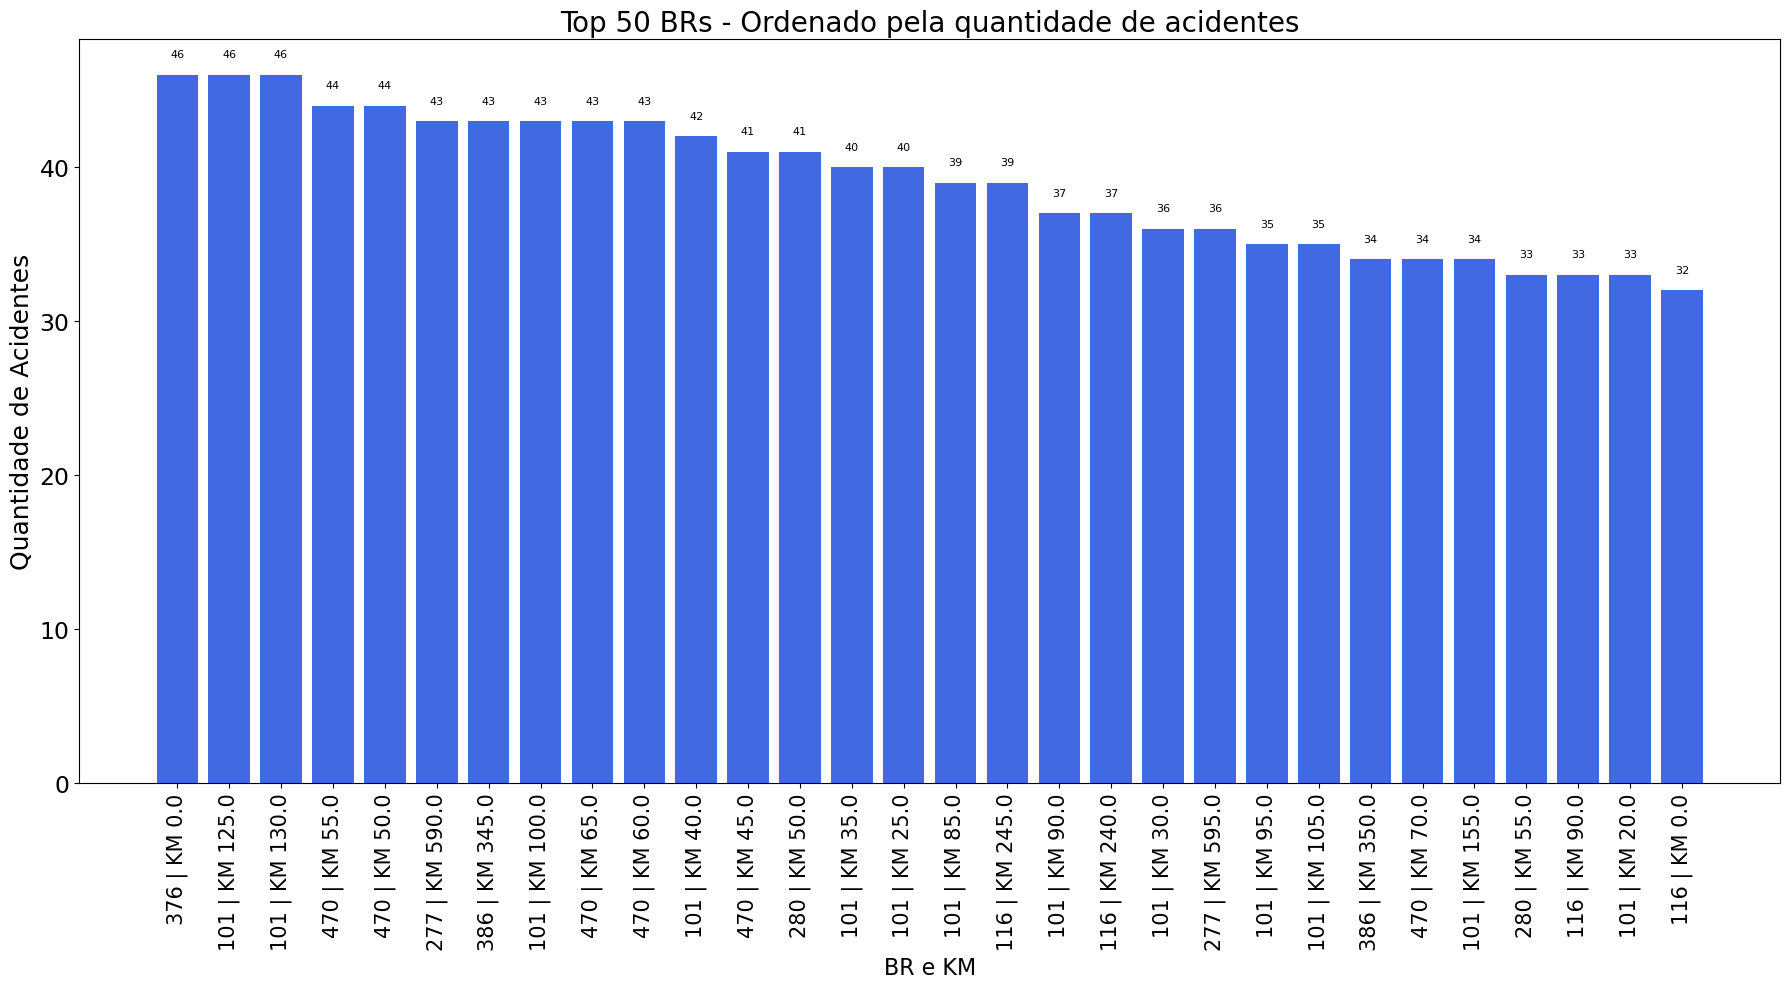

In [113]:
import matplotlib.pyplot as plt
df_agrupado['br_km'] = df_agrupado['br'].astype(str) + ' | KM ' + df_agrupado['km_faixa'].astype(str)

# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado.sort_values('qtd_acidentes', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_acidentes'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 50 BRs - Ordenado pela quantidade de acidentes', fontsize=20)
plt.tight_layout()
plt.show()

In [114]:
df_agrupado = df_agrupado.sort_values('qtd_mortos', ascending=False)
df_agrupado.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos,br_km
1284,376,545.0,15,16,376 | KM 545.0
26,101,130.0,46,14,101 | KM 130.0
1499,470,45.0,41,14,470 | KM 45.0
79,116,100.0,27,13,116 | KM 100.0
1149,369,505.0,13,13,369 | KM 505.0
...,...,...,...,...,...
1164,373,250.0,9,3,373 | KM 250.0
1232,376,235.0,13,3,376 | KM 235.0
1136,369,440.0,11,3,369 | KM 440.0
255,153,495.0,8,3,153 | KM 495.0


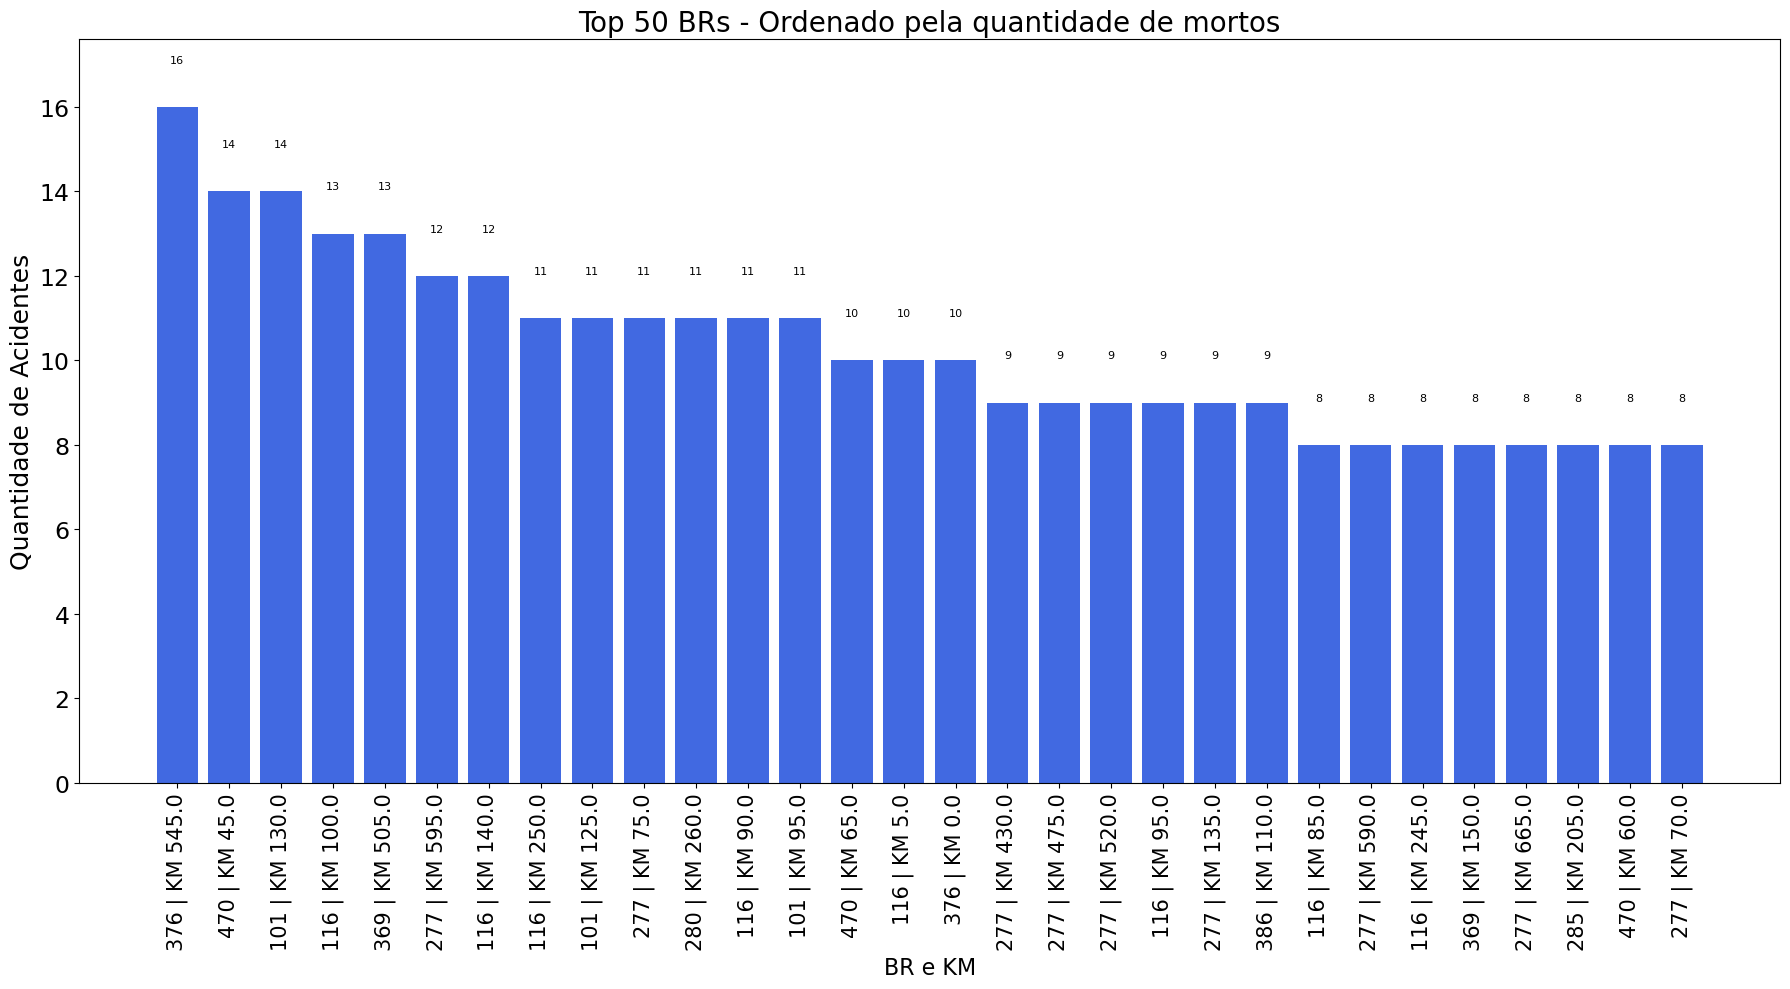

In [117]:
# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado.sort_values('qtd_mortos', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_mortos'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)
max_valor = top_30['qtd_mortos'].max()
plt.ylim(0, max_valor * 1.1)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 50 BRs - Ordenado pela quantidade de mortos', fontsize=20)
plt.tight_layout()
plt.show()